In [71]:
# Execute before using this notebook if using google colab
kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [72]:
import numpy as np 
import scipy.stats as stats

from utils import Datasets, plot_bar, plot_line

# Exercise 1

A (regular) dice is thrown 10 times. Answer the following questions:

- what is the probability that a six is shown exactly 5 times?

- what is the probability that a six is shown less than 3 times?

- what is the expected number of sixes shown?

- what is the variance of number of sixes (if you were to repeat the experiment multiple times)?

Note: a regular dice has 6 eyes (1, 2, 3, 4, 5, 6) with equal probability of being shown

## Solution 1

In [73]:
dice = stats.binom(10,1/6) # n = 10, p = 1/6

In [74]:
# exactly 5 times
dice.pmf(5)

0.013023810204237185

In [75]:
# prob for 0, 1 or 2 sixes
dice.cdf(2)

0.7752267978712596

In [76]:
# expected number of sixes
dice.mean()

1.6666666666666665

In [77]:
# variance in sixes
dice.var()

1.3888888888888888

In [78]:
dice = stats.binom(12,8/30)

In [79]:
dice.pmf(2)

0.21110361050610466

In [80]:
dice.mean()

3.2

In [81]:
dice.var()

2.346666666666667

# Exercise 2

A class has to take a multiple choice test with $20$ questions. Each question has $5$ possible answers of which only $1$ is correct. You need to answer at least $10$ questions correctly to pass the exam. 

- how many correct answers would you expect to receive by purely guessing?

- if $1.000$ students take the test, all of which will just guess the answers. How many of them would you expect to pass?

## Solution 2

In [82]:
n = 20
p = 1/5
bdist = stats.binom(n,p)

In [83]:
# How many correct answers would you expect by purely guessing?
bdist.mean()

4.0

In [84]:
# Probabilty to pass by only guessing # 1 - P(X <= 9)
p = 1 - bdist.cdf(9)
p*1000 # roughly 2 to 3 students could be expected to pass by only guessing

2.5948274006739602

# Exercise 3

A random variable $X$ is binomially distributed with a mean of $6$ and a variance of $4.2$. 

- write a function that calculates $n$ and $p$ from mean and variance

- what is $P(X \leq 6)$?

## Solution 3

We know that:

$$E(x) = np = 6$$

$$Var(x) = np(1-p) = 4.2$$

Rearranging the formulas we see that $$(1-p) = \frac{4.2}{np} = \frac{4.2}{6} \Rightarrow p = 1 - \frac{4.2}{6} \approx 0.3$$

This then yields:

$$0.3n = 6 \Rightarrow n = 20$$

In [85]:
mu = 6
var = 4.2
p = 1 - var/mu
n = mu / p

Let's put that logic into a function that returns a binomial random variable (object)

In [86]:
def bdist_from_mv(mu,var):
    p = 1 - var/mu
    n = mu/p
    return stats.binom(n,p)

In [87]:
bdist = bdist_from_mv(6,4.2)
bdist.cdf(6)

0.6080098122009242

# Exercise 4

You play a game with your friend. The game works as follows:

- You filp a coin. Head = you win, Tail = your friend wins  
    *(assume that it is a fair coin with $50\%$ probability of head or tail)*

- The person that wins 4 flips wins the overall game

Questions:

- what is the probability that the game lasts 4 games

- what is the probability that the game lasts 5 games

- what is the probability that the game lasts 7 games



## Solution 4

Probability of $4$ games:

This can only happen if either you or your friend win 4 games out of four.

In [88]:
bdist = stats.binom(4,0.5)
prob_you_win = bdist.pmf(4)
prob_friend_win = bdist.pmf(4)
prob_you_win + prob_friend_win

0.125

Probability of 5 games:

This can happen if you (or your friend) won 

- three out of the first four games and then
- wins the last game

In [89]:
prob_you_win = stats.binom.pmf(3,4,0.5) * 0.5
prob_you_win * 2

0.25000000000000006

Probability of 7 games: this can only happen if you (or your friend) won

- three out of 6 games and then
- wins the last game

In [90]:
prob_you_win = stats.binom.pmf(3,6,0.5) * 0.5
prob_you_win * 2

0.3125000000000002

# Exercise 5

The Value at Risk (VaR) is a measure that is used in (financial) risk modelling to quantify the level of financial risk. It is very commonly used in commercial and investment banks to quantify the maximum loss potential over a given period. 

Example: a **daily 95%-VaR of 50 Million TYR** means that only in 5% of the days the losses will exceed 50 Million TYR.

**Question:** what is the daily 99%-VaR or holding a position of 100 Million TYR in the German Dax? I.e. determine the loss threshold that only occurs in 1% of the days.

(Note: assume that daily returns are normally distributed)

In [91]:
prices = Datasets.dax_daily()

## Solution 5

In [92]:
# Calculate daily returns
ret = prices[1:] / prices[:-1] - 1

In [93]:
# Calculate mean and standard deviation
mu = np.mean(ret)
sig = np.std(ret)
mu, sig

(0.00040900045065627816, 0.014103491916929063)

In [94]:
# Create normal distribution with mu and sigma from daily dax returns
dax = stats.norm(mu,sig)

In [95]:
# Determine 1% lowest returns via CDF (trial and error)

In [96]:
dax.cdf(-0.0324)

0.010001186802647976

In [97]:
# Determine 1% lowest returns via PPF function from scipy (inverse of CDF, i.e. gives you a value given the probability)
dax.ppf(0.01)

-0.03240062798684383

In [98]:
cutoff = dax.ppf(0.01)
cutoff*100_000_000

-3240062.798684383

With a probability of 99% the daily loss will not exceed 3.24 Million TYR.

**Note**: the calculations are based on the assumption that stock returns are normally distributed. 

We can see that this is only approximately correct. 

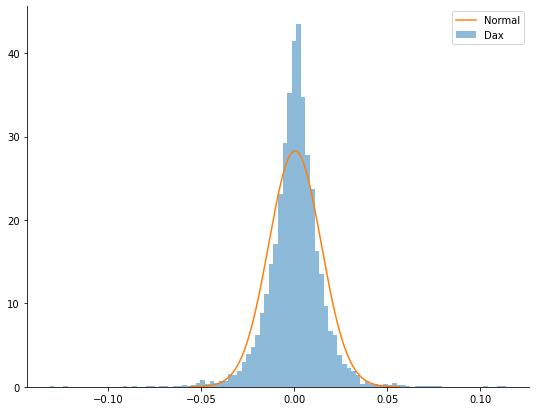

In [99]:
fig, ax = plt.subplots(figsize=(9,7))
ax.hist(ret,density=True, bins=100, alpha=0.5, label="Dax");
ax.plot(x,dax_dist.pdf(x), label="Normal");
ax.legend()
sns.despine()